In [1]:
import pandas as pd
import statistics
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.decomposition import PCA
import seaborn as sns

file = 'medical_raw_data.csv'

df = pd.read_csv(file, index_col = [0])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 52 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  Timezone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            7412 non-null   float64
 15  Age                 7586 non-null   float64
 16  Educ

In [2]:
df.duplicated()

1        False
2        False
3        False
4        False
5        False
         ...  
9996     False
9997     False
9998     False
9999     False
10000    False
Length: 10000, dtype: bool

In [3]:
print(df.duplicated().value_counts())

False    10000
dtype: int64


In [4]:
df.isnull().sum()

CaseOrder                0
Customer_id              0
Interaction              0
UID                      0
City                     0
State                    0
County                   0
Zip                      0
Lat                      0
Lng                      0
Population               0
Area                     0
Timezone                 0
Job                      0
Children              2588
Age                   2414
Education                0
Employment               0
Income                2464
Marital                  0
Gender                   0
ReAdmis                  0
VitD_levels              0
Doc_visits               0
Full_meals_eaten         0
VitD_supp                0
Soft_drink            2467
Initial_admin            0
HighBlood                0
Stroke                   0
Complication_risk        0
Overweight             982
Arthritis                0
Diabetes                 0
Hyperlipidemia           0
BackPain                 0
Anxiety                984
A

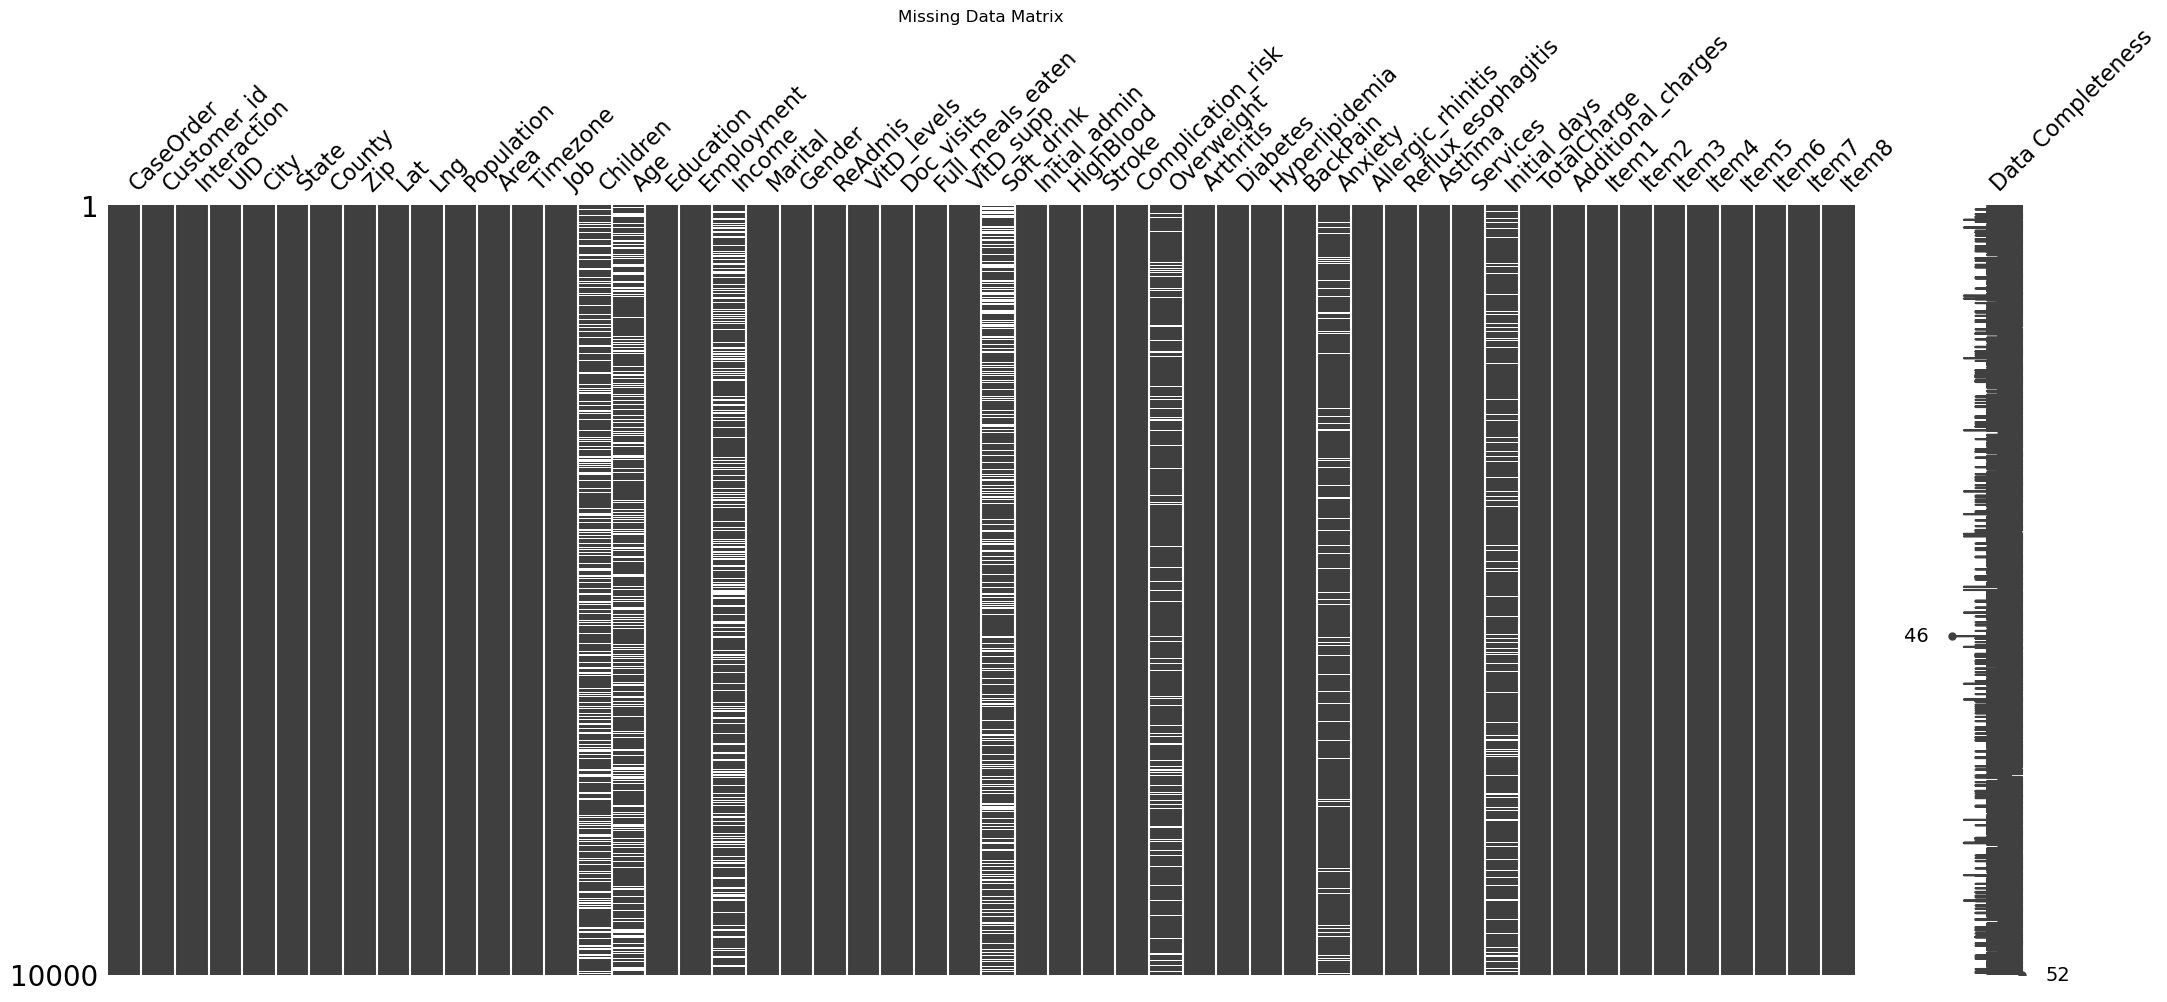

In [5]:
msno.matrix(df, labels = True)
plt.title('Missing Data Matrix')
plt.show()

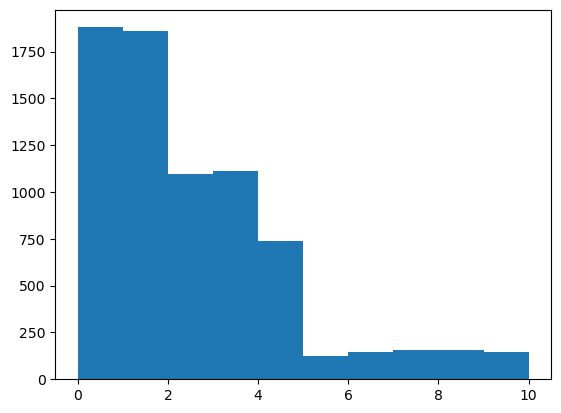

In [6]:
plt.hist(df['Children'])
plt.show()

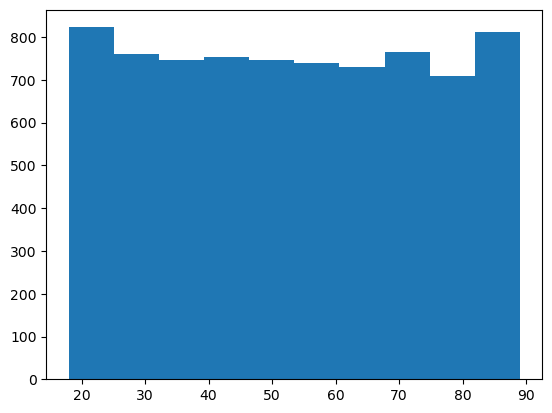

In [7]:
plt.hist(df['Age'])
plt.show()

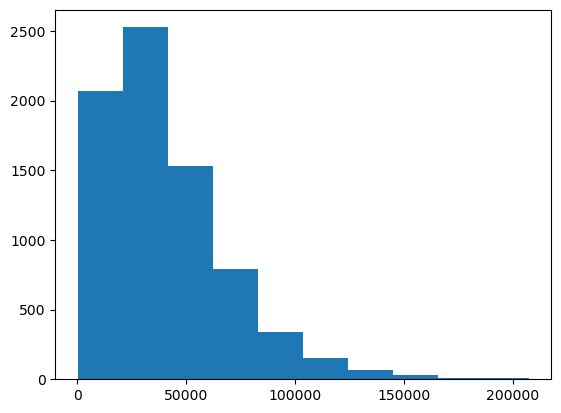

In [8]:
plt.hist(df['Income'])
plt.show()

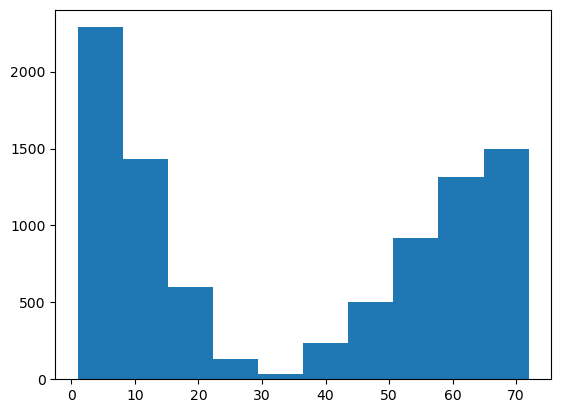

In [9]:
plt.hist(df['Initial_days'])
plt.show()

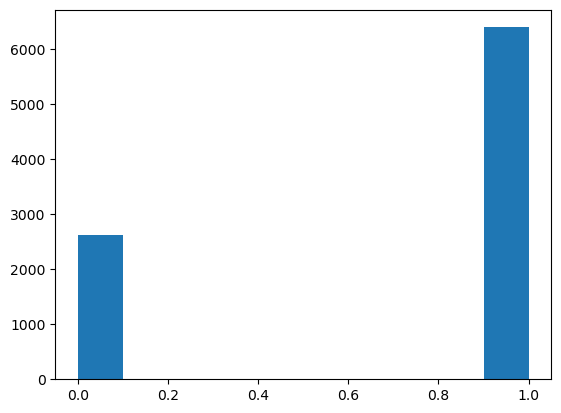

In [10]:
plt.hist(df['Overweight'])
plt.show()

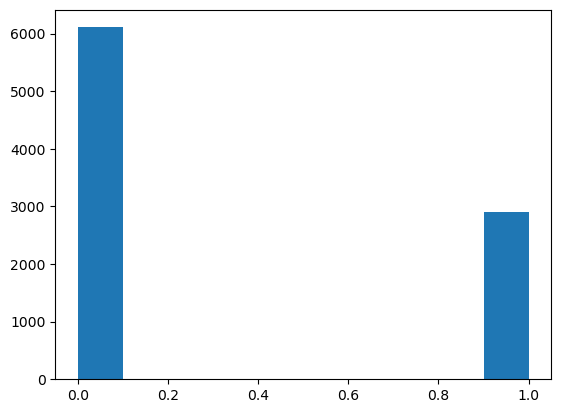

In [11]:
plt.hist(df['Anxiety'])
plt.show()

<AxesSubplot:>

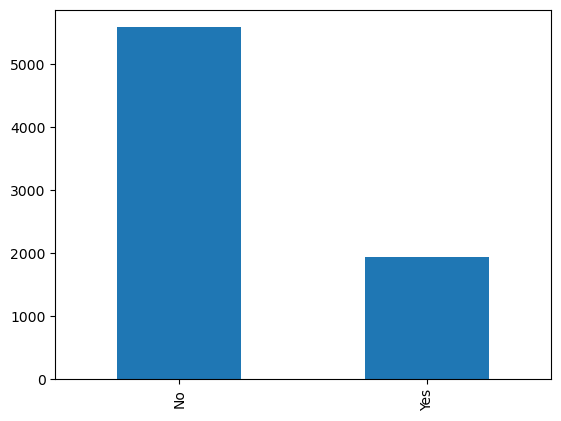

In [12]:
df['Soft_drink'].value_counts().plot(kind = 'bar')

In [13]:
df[['Children','Age','Income','Initial_days','Overweight','Anxiety','Soft_drink']].describe(include = 'all')

,Children,Age,Income,Initial_days,Overweight,Anxiety,Soft_drink
count,7412.000000,7586.000000,7536.000000,8944.000000,9018.000000,9016.000000,7533
unique,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,NaN,NaN,NaN,NaN,5589
mean,2.098219,53.295676,40484.438268,34.432082,0.709137,0.322316,NaN
std,2.155427,20.659182,28664.861050,26.287050,0.454186,0.467389,NaN
min,0.000000,18.000000,154.080000,1.001981,0.000000,0.000000,NaN
25%,0.000000,35.000000,19450.792500,7.911709,0.000000,0.000000,NaN
50%,1.000000,53.000000,33942.280000,34.446941,1.000000,0.000000,NaN
75%,3.000000,71.000000,54075.235000,61.124654,1.000000,1.000000,NaN


In [14]:
df[['Children','Age','Income','Initial_days','Overweight','Anxiety']].median()

Children            1.000000
Age                53.000000
Income          33942.280000
Initial_days       34.446941
Overweight          1.000000
Anxiety             0.000000
dtype: float64

In [15]:
df['Children'].fillna(df['Children'].median(), inplace = True)
df['Age'].fillna(df['Age'].mean(), inplace = True)
df['Income'].fillna(df['Income'].median(), inplace = True)
df['Initial_days'].fillna(df['Initial_days'].median(), inplace = True)
df['Overweight'] = df['Overweight'].fillna(df['Overweight'].mode()[0])
df['Anxiety'] = df['Anxiety'].fillna(df['Anxiety'].mode()[0])
df['Soft_drink'] = df['Soft_drink'].fillna(df['Soft_drink'].mode()[0])

In [16]:
df[['Children','Age','Income','Initial_days','Overweight','Anxiety','Soft_drink']].describe(include = 'all')

,Children,Age,Income,Initial_days,Overweight,Anxiety,Soft_drink
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000
unique,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,NaN,NaN,NaN,NaN,8056
mean,1.814000,53.295676,38872.450471,34.433651,0.737700,0.290600,NaN
std,1.916969,17.993375,25042.796229,24.860232,0.439907,0.454062,NaN
min,0.000000,18.000000,154.080000,1.001981,0.000000,0.000000,NaN
25%,1.000000,41.000000,23956.162500,8.928987,0.000000,0.000000,NaN
50%,1.000000,53.295676,33942.280000,34.446941,1.000000,0.000000,NaN
75%,3.000000,65.000000,46466.797500,59.459981,1.000000,1.000000,NaN


In [17]:
df[['Children','Age','Income','Initial_days','Overweight','Anxiety']].median()

Children            1.000000
Age                53.295676
Income          33942.280000
Initial_days       34.446941
Overweight          1.000000
Anxiety             0.000000
dtype: float64

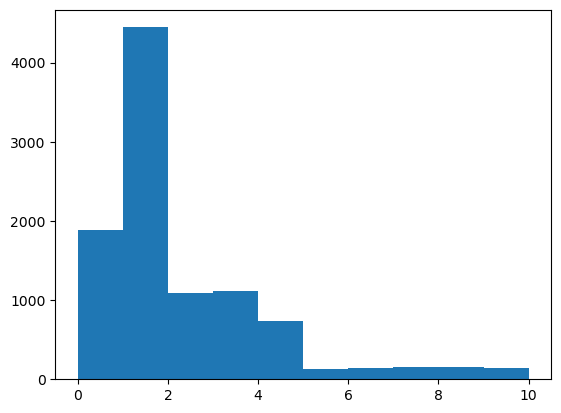

In [18]:
plt.hist(df['Children'])
plt.show()

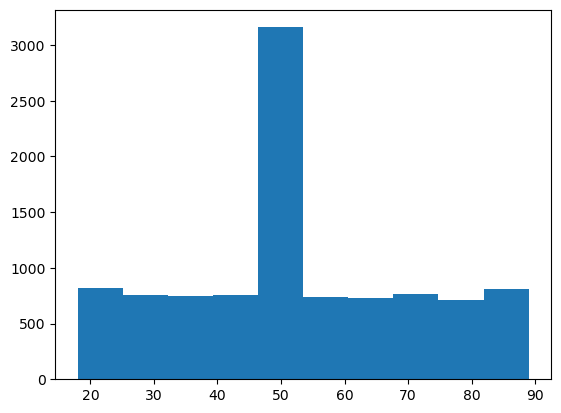

In [19]:
plt.hist(df['Age'])
plt.show()

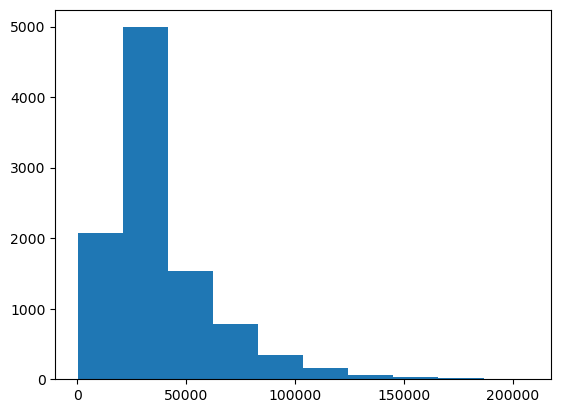

In [20]:
plt.hist(df['Income'])
plt.show()

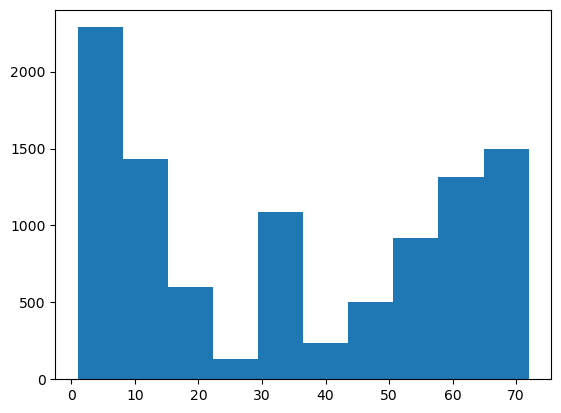

In [21]:
plt.hist(df['Initial_days'])
plt.show()

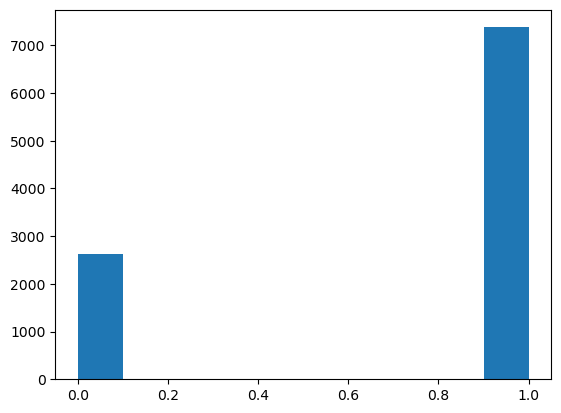

In [22]:
plt.hist(df['Overweight'])
plt.show()

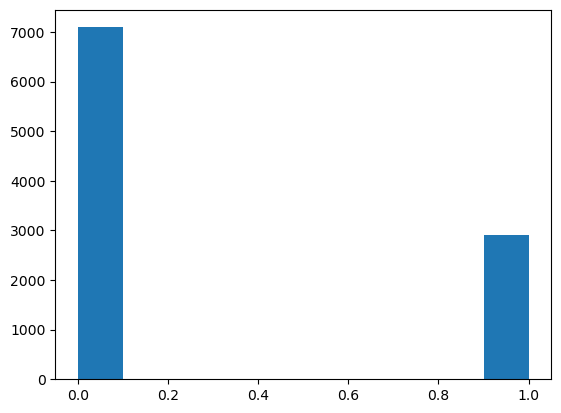

In [23]:
plt.hist(df['Anxiety'])
plt.show()

<AxesSubplot:>

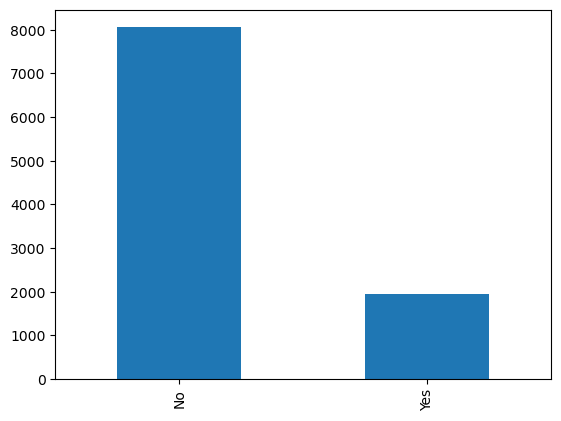

In [24]:
df['Soft_drink'].value_counts().plot(kind = 'bar')

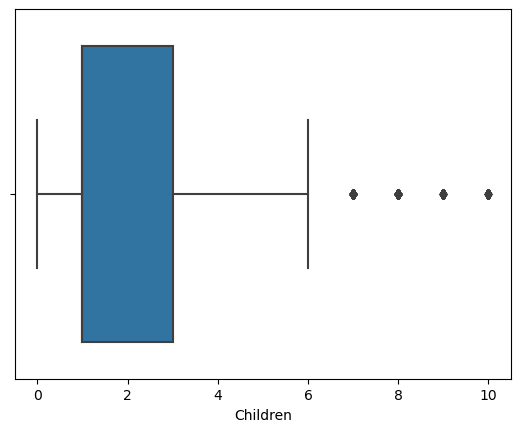

In [25]:
boxplot = sns.boxplot(x='Children', data=df)

In [26]:
df['Z_Score_Children'] = stats.zscore(df['Children'])
df[['Children','Z_Score_Children']].head()

,Children,Z_Score_Children
1,1.0,-0.424650
2,3.0,0.618716
3,3.0,0.618716
4,0.0,-0.946333
5,1.0,-0.424650


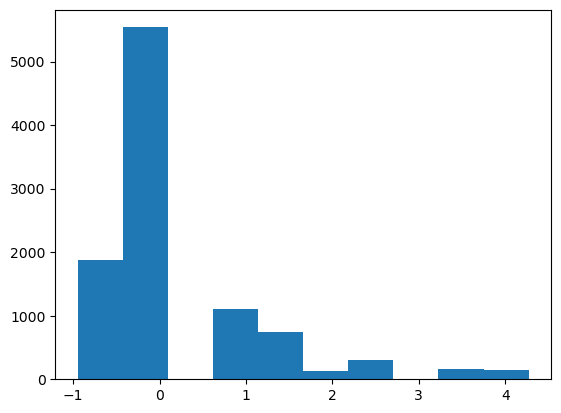

In [27]:
plt.hist(df['Z_Score_Children'])
plt.show()

In [28]:
children_query = df.query('Children > 6')
children_query.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 457 entries, 8 to 10000
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           457 non-null    int64  
 1   Customer_id         457 non-null    object 
 2   Interaction         457 non-null    object 
 3   UID                 457 non-null    object 
 4   City                457 non-null    object 
 5   State               457 non-null    object 
 6   County              457 non-null    object 
 7   Zip                 457 non-null    int64  
 8   Lat                 457 non-null    float64
 9   Lng                 457 non-null    float64
 10  Population          457 non-null    int64  
 11  Area                457 non-null    object 
 12  Timezone            457 non-null    object 
 13  Job                 457 non-null    object 
 14  Children            457 non-null    float64
 15  Age                 457 non-null    float64
 16  Educat

In [29]:
df['Children'] = np.where(df['Children'] > 6, np.nan, df['Children'])
df['Children'].fillna(df['Children'].median(), inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  Timezone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  float64
 15  Age                 10000 non-null  float64
 16  Educ

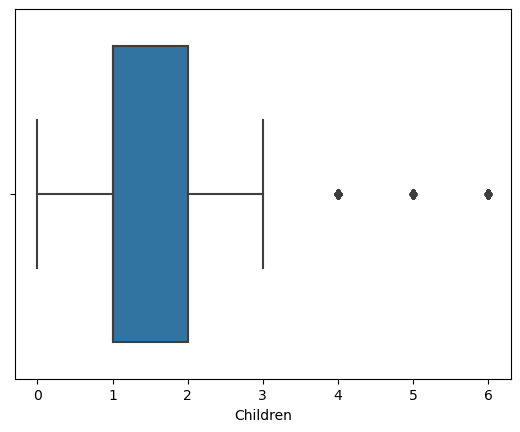

In [30]:
boxplot = sns.boxplot(x='Children', data=df)

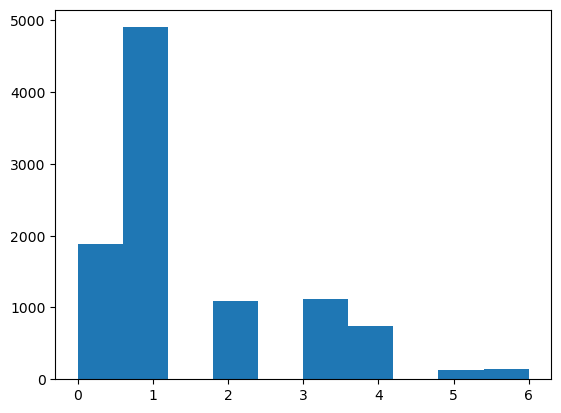

In [31]:
plt.hist(df['Children'])
plt.show()

In [32]:
df['Z_Score_Children'] = stats.zscore(df['Children'])
df[['Children','Z_Score_Children']].head()

,Children,Z_Score_Children
1,1.0,-0.371147
2,3.0,1.148078
3,3.0,1.148078
4,0.0,-1.130759
5,1.0,-0.371147


In [33]:
df['Children'].value_counts()

1.0    4903
0.0    1880
3.0    1113
2.0    1094
4.0     739
6.0     145
5.0     126
Name: Children, dtype: int64

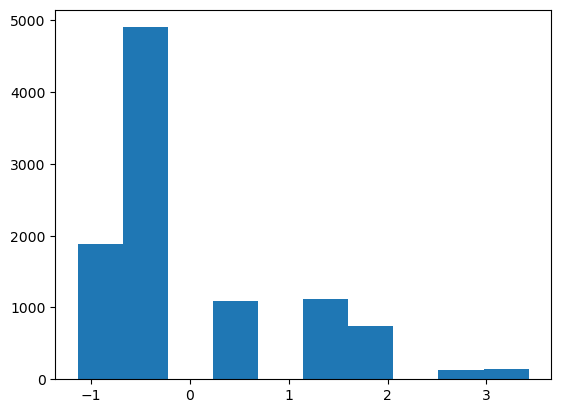

In [34]:
plt.hist(df['Z_Score_Children'])
plt.show()

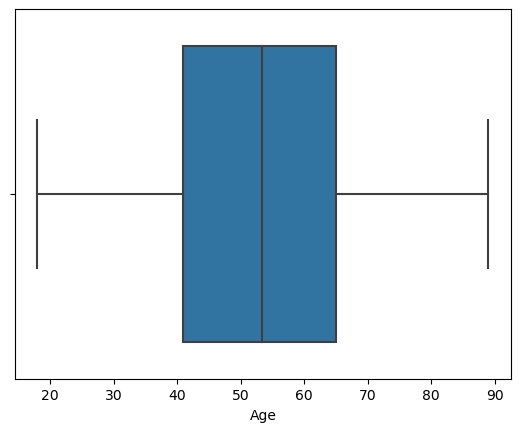

In [35]:
boxplot = sns.boxplot(x='Age', data=df)

In [36]:
df['Z_Score_Age'] = stats.zscore(df['Age'])
df[['Age','Z_Score_Age']].head()

,Age,Z_Score_Age
1,53.0,-0.016433
2,51.0,-0.127591
3,53.0,-0.016433
4,78.0,1.373036
5,22.0,-1.739376


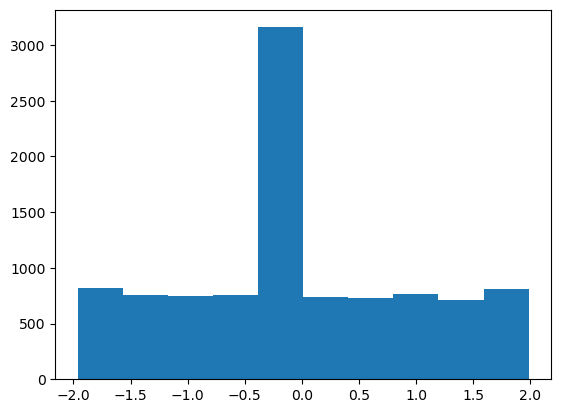

In [37]:
plt.hist(df['Z_Score_Age'])
plt.show()

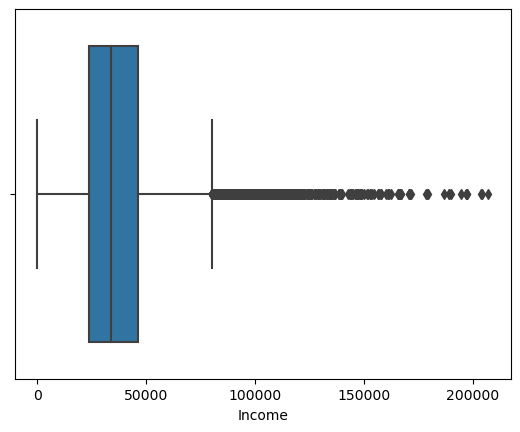

In [38]:
boxplot = sns.boxplot(x='Income', data=df)

In [39]:
df['Z_Score_Income'] = stats.zscore(df['Income'])
df[['Income','Z_Score_Income']].head()

,Income,Z_Score_Income
1,86575.93,1.904974
2,46805.99,0.316815
3,14370.14,-0.978466
4,39741.49,0.034704
5,1209.56,-1.504016


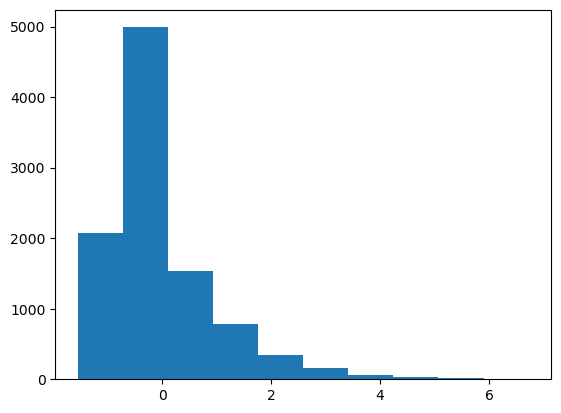

In [40]:
plt.hist(df['Z_Score_Income'])
plt.show()

In [41]:
income_query = df.query('Income > 80000')
income_query.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 1 to 9987
Data columns (total 55 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           714 non-null    int64  
 1   Customer_id         714 non-null    object 
 2   Interaction         714 non-null    object 
 3   UID                 714 non-null    object 
 4   City                714 non-null    object 
 5   State               714 non-null    object 
 6   County              714 non-null    object 
 7   Zip                 714 non-null    int64  
 8   Lat                 714 non-null    float64
 9   Lng                 714 non-null    float64
 10  Population          714 non-null    int64  
 11  Area                714 non-null    object 
 12  Timezone            714 non-null    object 
 13  Job                 714 non-null    object 
 14  Children            714 non-null    float64
 15  Age                 714 non-null    float64
 16  Educati

In [42]:
df['Income'] = np.where(df['Income'] > 80000, np.nan, df['Income'])
df['Income'].fillna(df['Income'].median(), inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 55 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  Timezone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  float64
 15  Age                 10000 non-null  float64
 16  Educ

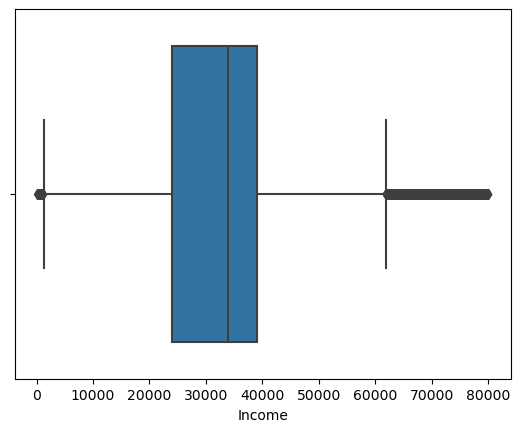

In [43]:
boxplot = sns.boxplot(x='Income', data=df)

In [44]:
df['Z_Score_Income'] = stats.zscore(df['Income'])
df[['Income','Z_Score_Income']].head()

,Income,Z_Score_Income
1,33942.28,0.008042
2,46805.99,0.818290
3,14370.14,-1.224752
4,39741.49,0.373317
5,1209.56,-2.053700


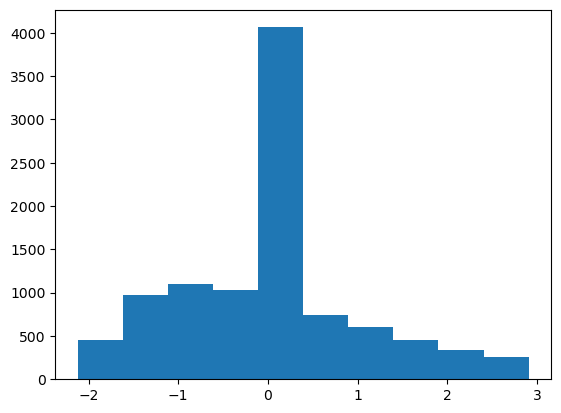

In [45]:
plt.hist(df['Z_Score_Income'])
plt.show()

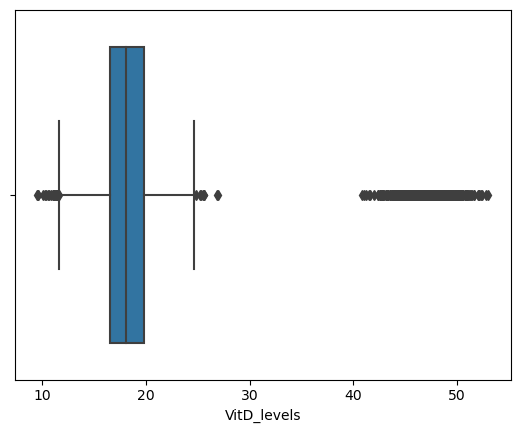

In [46]:
boxplot = sns.boxplot(x='VitD_levels', data=df)

In [47]:
df['Z_Score_VitD_levels'] = stats.zscore(df['VitD_levels'])
df[['VitD_levels','Z_Score_VitD_levels']].head()

,VitD_levels,Z_Score_VitD_levels
1,17.802330,-0.239530
2,18.994640,-0.062181
3,17.415889,-0.297011
4,17.420079,-0.296388
5,16.870524,-0.378131


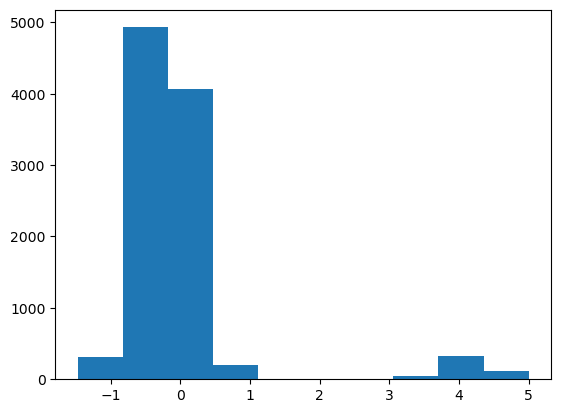

In [48]:
plt.hist(df['Z_Score_VitD_levels'])
plt.show()

In [49]:
outliers = df[(df['VitD_levels'] > 40)]
outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 12 to 9974
Data columns (total 56 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CaseOrder            500 non-null    int64  
 1   Customer_id          500 non-null    object 
 2   Interaction          500 non-null    object 
 3   UID                  500 non-null    object 
 4   City                 500 non-null    object 
 5   State                500 non-null    object 
 6   County               500 non-null    object 
 7   Zip                  500 non-null    int64  
 8   Lat                  500 non-null    float64
 9   Lng                  500 non-null    float64
 10  Population           500 non-null    int64  
 11  Area                 500 non-null    object 
 12  Timezone             500 non-null    object 
 13  Job                  500 non-null    object 
 14  Children             500 non-null    float64
 15  Age                  500 non-null    f

In [50]:
df.drop(df[(df['VitD_levels'] > 40)].index, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9500 entries, 1 to 10000
Data columns (total 56 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CaseOrder            9500 non-null   int64  
 1   Customer_id          9500 non-null   object 
 2   Interaction          9500 non-null   object 
 3   UID                  9500 non-null   object 
 4   City                 9500 non-null   object 
 5   State                9500 non-null   object 
 6   County               9500 non-null   object 
 7   Zip                  9500 non-null   int64  
 8   Lat                  9500 non-null   float64
 9   Lng                  9500 non-null   float64
 10  Population           9500 non-null   int64  
 11  Area                 9500 non-null   object 
 12  Timezone             9500 non-null   object 
 13  Job                  9500 non-null   object 
 14  Children             9500 non-null   float64
 15  Age                  9500 non-null   

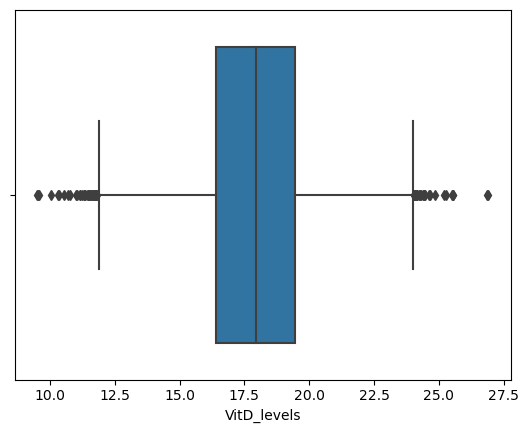

In [51]:
boxplot = sns.boxplot(x='VitD_levels', data=df)

In [52]:
df['Z_Score_VitD_levels'] = stats.zscore(df['VitD_levels'])
df[['VitD_levels','Z_Score_VitD_levels']].head()

,VitD_levels,Z_Score_VitD_levels
1,17.802330,-0.069681
2,18.994640,0.459989
3,17.415889,-0.241354
4,17.420079,-0.239492
5,16.870524,-0.483626


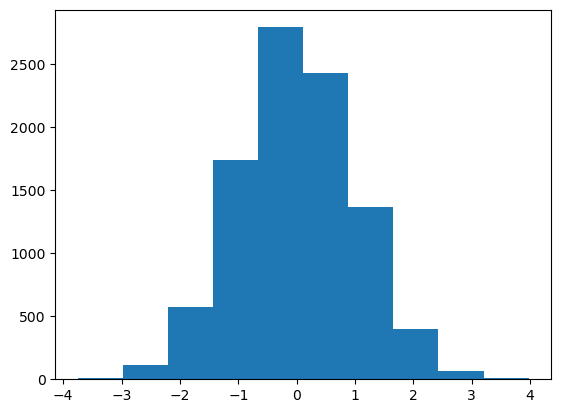

In [53]:
plt.hist(df['Z_Score_VitD_levels'])
plt.show()

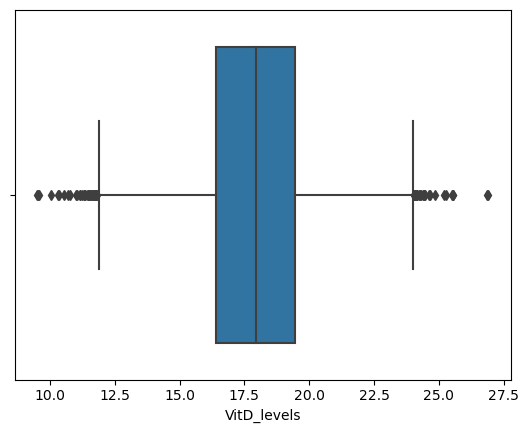

In [54]:
boxplot = sns.boxplot(x='VitD_levels', data=df)

In [55]:
VitD_levels_query = df.query('VitD_levels > 23')
VitD_levels_query.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121 entries, 23 to 9964
Data columns (total 56 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CaseOrder            121 non-null    int64  
 1   Customer_id          121 non-null    object 
 2   Interaction          121 non-null    object 
 3   UID                  121 non-null    object 
 4   City                 121 non-null    object 
 5   State                121 non-null    object 
 6   County               121 non-null    object 
 7   Zip                  121 non-null    int64  
 8   Lat                  121 non-null    float64
 9   Lng                  121 non-null    float64
 10  Population           121 non-null    int64  
 11  Area                 121 non-null    object 
 12  Timezone             121 non-null    object 
 13  Job                  121 non-null    object 
 14  Children             121 non-null    float64
 15  Age                  121 non-null    f

In [56]:
VitD_levels_query = df.query('VitD_levels < 12.5')
VitD_levels_query.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 199 to 9669
Data columns (total 56 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CaseOrder            73 non-null     int64  
 1   Customer_id          73 non-null     object 
 2   Interaction          73 non-null     object 
 3   UID                  73 non-null     object 
 4   City                 73 non-null     object 
 5   State                73 non-null     object 
 6   County               73 non-null     object 
 7   Zip                  73 non-null     int64  
 8   Lat                  73 non-null     float64
 9   Lng                  73 non-null     float64
 10  Population           73 non-null     int64  
 11  Area                 73 non-null     object 
 12  Timezone             73 non-null     object 
 13  Job                  73 non-null     object 
 14  Children             73 non-null     float64
 15  Age                  73 non-null     f

In [57]:
df['Z_Score_VitD_levels'] = stats.zscore(df['VitD_levels'])
df[['VitD_levels','Z_Score_VitD_levels']].head()

,VitD_levels,Z_Score_VitD_levels
1,17.802330,-0.069681
2,18.994640,0.459989
3,17.415889,-0.241354
4,17.420079,-0.239492
5,16.870524,-0.483626


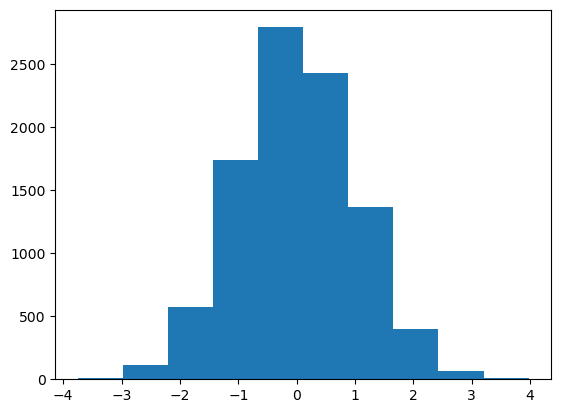

In [58]:
plt.hist(df['Z_Score_VitD_levels'])
plt.show()

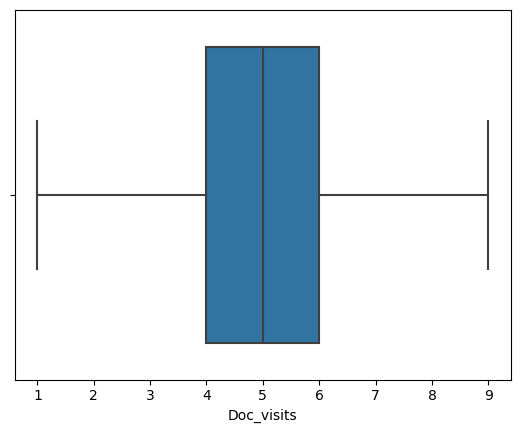

In [59]:
boxplot = sns.boxplot(x='Doc_visits', data=df)

In [60]:
df['Z_Score_Doc_visits'] = stats.zscore(df['Doc_visits'])
df[['Doc_visits','Z_Score_Doc_visits']].head()

,Doc_visits,Z_Score_Doc_visits
1,6,0.942733
2,4,-0.966243
3,4,-0.966243
4,4,-0.966243
5,5,-0.011755


In [61]:
df['Z_Score_Doc_visits'].describe()

count    9.500000e+03
mean     3.863861e-16
std      1.000053e+00
min     -3.829707e+00
25%     -9.662433e-01
50%     -1.175527e-02
75%      9.427327e-01
max      3.806197e+00
Name: Z_Score_Doc_visits, dtype: float64

In [62]:
df['Doc_visits'].value_counts()

5    3623
6    2319
4    2261
7     606
3     570
8      57
2      56
1       6
9       2
Name: Doc_visits, dtype: int64

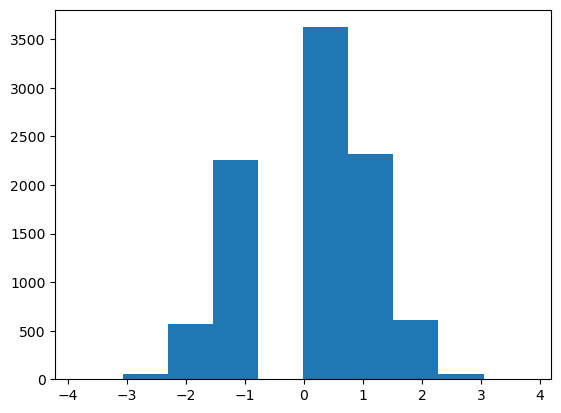

In [63]:
plt.hist(df['Z_Score_Doc_visits'])
plt.show()

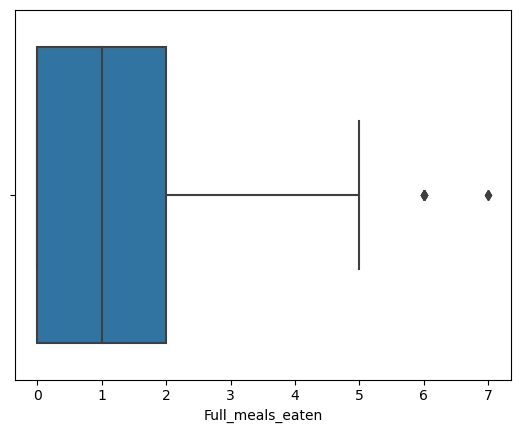

In [64]:
boxplot = sns.boxplot(x='Full_meals_eaten', data=df)

In [65]:
df['Z_Score_Full_meals_eaten'] = stats.zscore(df['Full_meals_eaten'])
df[['Full_meals_eaten','Z_Score_Full_meals_eaten']].head()

,Full_meals_eaten,Z_Score_Full_meals_eaten
1,0,-0.993442
2,2,0.992188
3,1,-0.000627
4,1,-0.000627
5,0,-0.993442


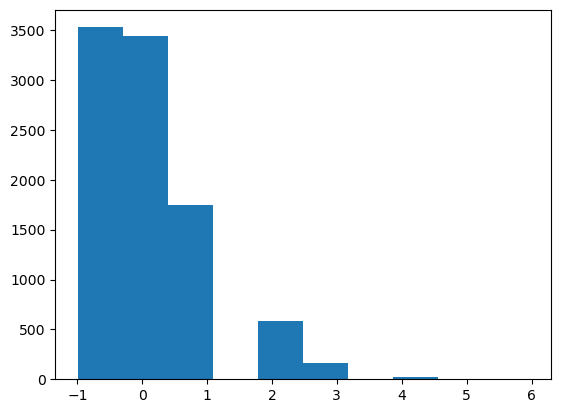

In [66]:
plt.hist(df['Z_Score_Full_meals_eaten'])
plt.show()

In [67]:
df['Full_meals_eaten'].value_counts()

0    3529
1    3443
2    1750
3     588
4     161
5      21
6       6
7       2
Name: Full_meals_eaten, dtype: int64

In [68]:
Full_meals_eaten_query = df.query('Full_meals_eaten > 5')
Full_meals_eaten_query.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 959 to 9987
Data columns (total 58 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CaseOrder                 8 non-null      int64  
 1   Customer_id               8 non-null      object 
 2   Interaction               8 non-null      object 
 3   UID                       8 non-null      object 
 4   City                      8 non-null      object 
 5   State                     8 non-null      object 
 6   County                    8 non-null      object 
 7   Zip                       8 non-null      int64  
 8   Lat                       8 non-null      float64
 9   Lng                       8 non-null      float64
 10  Population                8 non-null      int64  
 11  Area                      8 non-null      object 
 12  Timezone                  8 non-null      object 
 13  Job                       8 non-null      object 
 14  Children 

In [69]:
df['Full_meals_eaten'] = np.where(df['Full_meals_eaten'] > 5, np.nan, df['Full_meals_eaten'])
df['Full_meals_eaten'].fillna(5, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9500 entries, 1 to 10000
Data columns (total 58 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CaseOrder                 9500 non-null   int64  
 1   Customer_id               9500 non-null   object 
 2   Interaction               9500 non-null   object 
 3   UID                       9500 non-null   object 
 4   City                      9500 non-null   object 
 5   State                     9500 non-null   object 
 6   County                    9500 non-null   object 
 7   Zip                       9500 non-null   int64  
 8   Lat                       9500 non-null   float64
 9   Lng                       9500 non-null   float64
 10  Population                9500 non-null   int64  
 11  Area                      9500 non-null   object 
 12  Timezone                  9500 non-null   object 
 13  Job                       9500 non-null   object 
 14  Childre

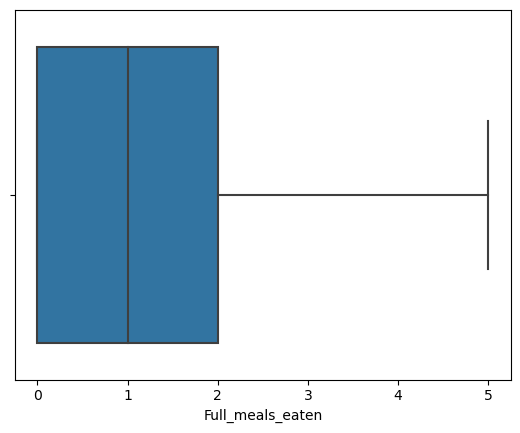

In [70]:
boxplot = sns.boxplot(x='Full_meals_eaten', data=df)

In [71]:
df['Z_Score_Full_meals_eaten'] = stats.zscore(df['Full_meals_eaten'])
df[['Full_meals_eaten','Z_Score_Full_meals_eaten']].head()

,Full_meals_eaten,Z_Score_Full_meals_eaten
1,0.0,-0.997272
2,2.0,0.998112
3,1.0,0.000420
4,1.0,0.000420
5,0.0,-0.997272


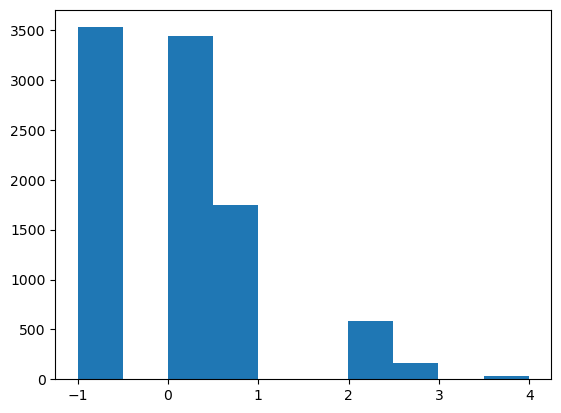

In [72]:
plt.hist(df['Z_Score_Full_meals_eaten'])
plt.show()

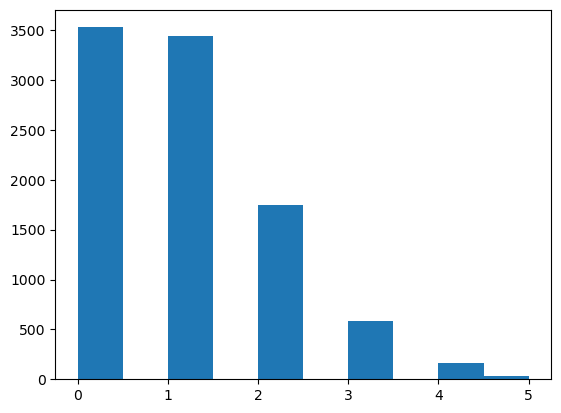

In [73]:
plt.hist(df['Full_meals_eaten'])
plt.show()

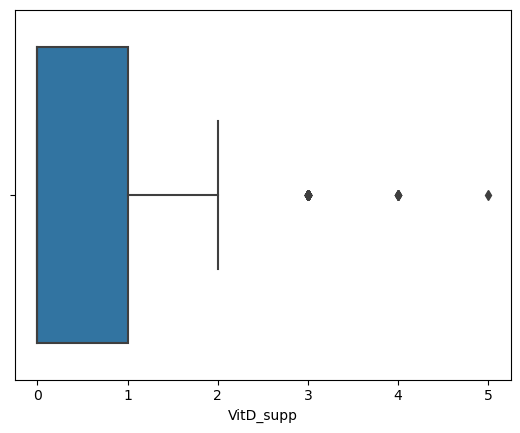

In [74]:
boxplot = sns.boxplot(x='VitD_supp', data=df)

In [75]:
df['Z_Score_VitD_supp'] = stats.zscore(df['VitD_supp'])
df[['VitD_supp','Z_Score_VitD_supp']].head()

,VitD_supp,Z_Score_VitD_supp
1,0,-0.634804
2,1,0.963563
3,0,-0.634804
4,0,-0.634804
5,2,2.561930


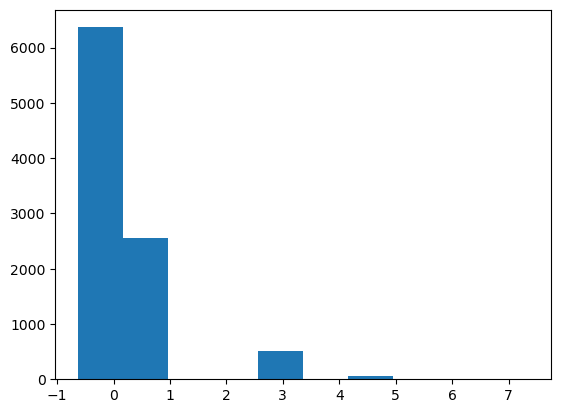

In [76]:
plt.hist(df['Z_Score_VitD_supp'])
plt.show()

In [77]:
VitD_supp_query = df.query('VitD_supp > 2')
VitD_supp_query.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 63 to 9983
Data columns (total 59 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CaseOrder                 65 non-null     int64  
 1   Customer_id               65 non-null     object 
 2   Interaction               65 non-null     object 
 3   UID                       65 non-null     object 
 4   City                      65 non-null     object 
 5   State                     65 non-null     object 
 6   County                    65 non-null     object 
 7   Zip                       65 non-null     int64  
 8   Lat                       65 non-null     float64
 9   Lng                       65 non-null     float64
 10  Population                65 non-null     int64  
 11  Area                      65 non-null     object 
 12  Timezone                  65 non-null     object 
 13  Job                       65 non-null     object 
 14  Children 

In [78]:
df['VitD_supp'].value_counts()

0    6369
1    2561
2     505
3      59
4       5
5       1
Name: VitD_supp, dtype: int64

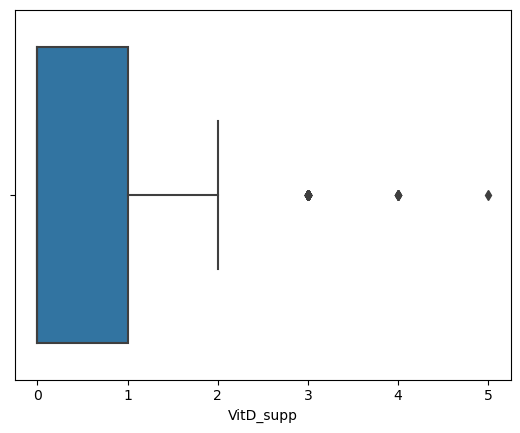

In [79]:
boxplot = sns.boxplot(x='VitD_supp', data=df)

In [80]:
df['Z_Score_VitD_supp'] = stats.zscore(df['VitD_supp'])
df[['VitD_supp','Z_Score_VitD_supp']].head()

,VitD_supp,Z_Score_VitD_supp
1,0,-0.634804
2,1,0.963563
3,0,-0.634804
4,0,-0.634804
5,2,2.561930


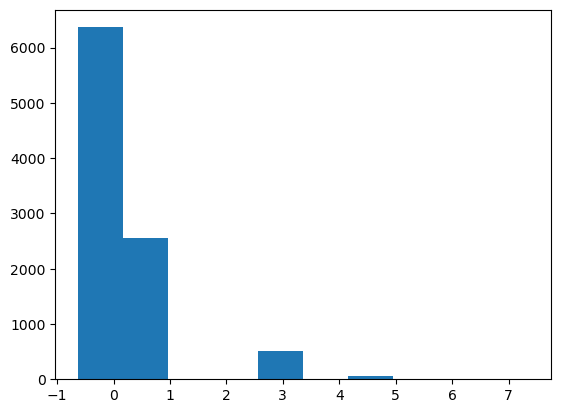

In [81]:
plt.hist(df['Z_Score_VitD_supp'])
plt.show()

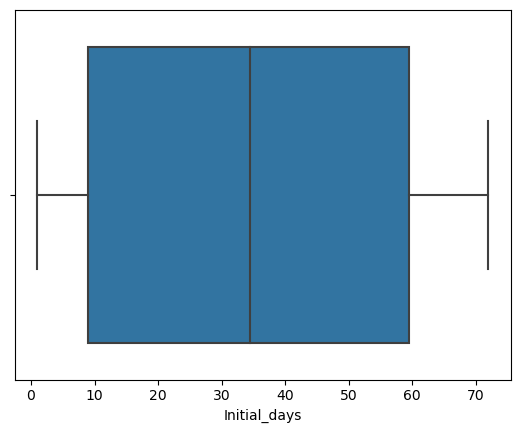

In [82]:
boxplot = sns.boxplot(x='Initial_days', data=df)

In [83]:
df['Z_Score_Initial_days'] = stats.zscore(df['Initial_days'])
df[['Initial_days','Z_Score_Initial_days']].head()

,Initial_days,Z_Score_Initial_days
1,10.585770,-0.958493
2,15.129562,-0.775697
3,4.772177,-1.192374
4,1.714879,-1.315368
5,1.254807,-1.333877


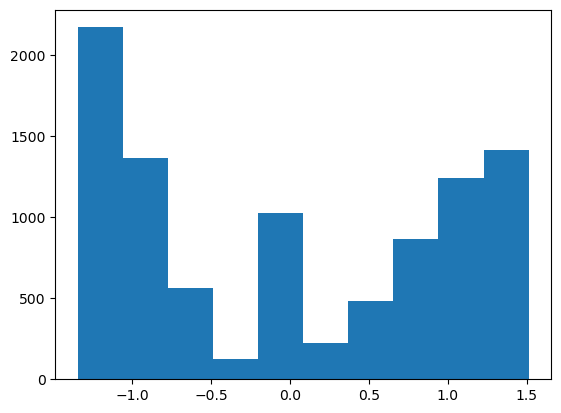

In [84]:
plt.hist(df['Z_Score_Initial_days'])
plt.show()

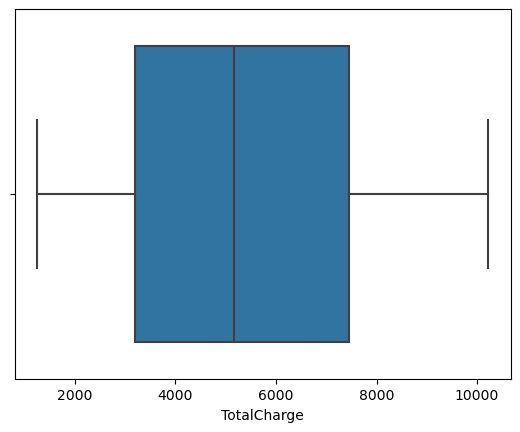

In [85]:
boxplot = sns.boxplot(x='TotalCharge', data=df)

In [86]:
df['Z_Score_TotalCharge'] = stats.zscore(df['TotalCharge'])
df[['TotalCharge','Z_Score_TotalCharge']].head()

,TotalCharge,Z_Score_TotalCharge
1,3191.048774,-0.956712
2,4214.905346,-0.493546
3,2177.586768,-1.415175
4,2465.118965,-1.285103
5,1885.655137,-1.547237


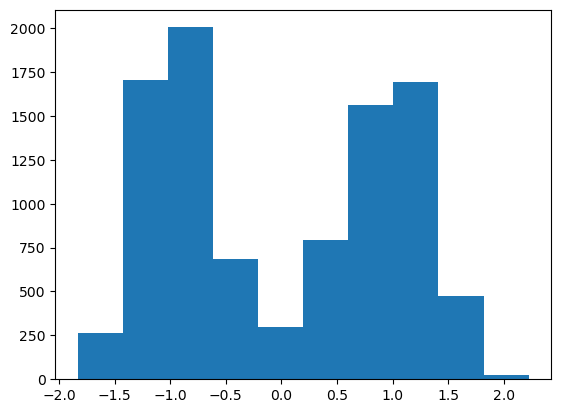

In [87]:
plt.hist(df['Z_Score_TotalCharge'])
plt.show()

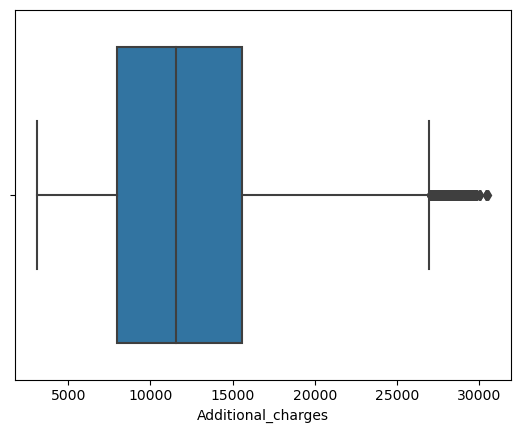

In [88]:
boxplot = sns.boxplot(x='Additional_charges', data=df)

In [89]:
df['Z_Score_Additional_charges'] = stats.zscore(df['Additional_charges'])
df[['Additional_charges','Z_Score_Additional_charges']].head()

,Additional_charges,Z_Score_Additional_charges
1,17939.403420,0.769443
2,17612.998120,0.719476
3,17505.192460,0.702973
4,12993.437350,0.012298
5,3716.525786,-1.407844


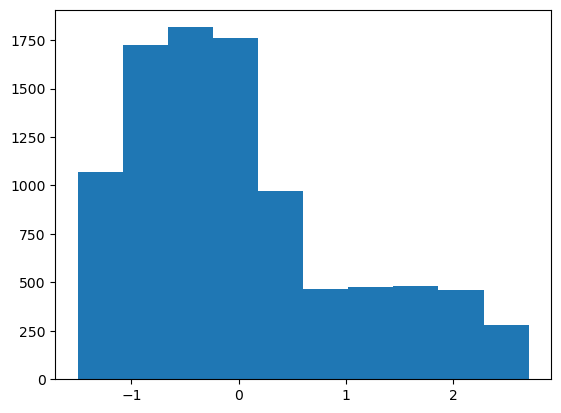

In [90]:
plt.hist(df['Z_Score_Additional_charges'])
plt.show()

In [91]:
df['Z_Score_Additional_charges'].describe()

count    9.500000e+03
mean    -2.010585e-16
std      1.000053e+00
min     -1.498290e+00
25%     -7.540988e-01
50%     -2.085185e-01
75%      4.102476e-01
max      2.702378e+00
Name: Z_Score_Additional_charges, dtype: float64

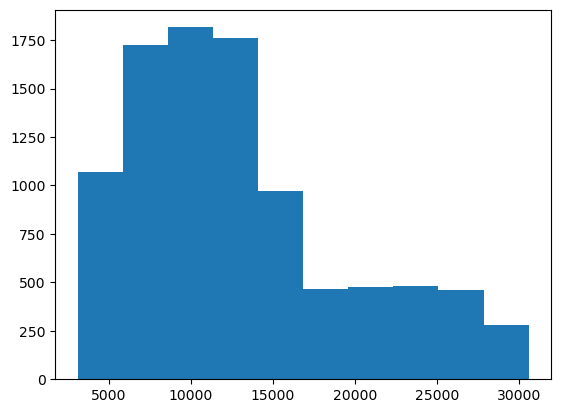

In [92]:
plt.hist(df['Additional_charges'])
plt.show()

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9500 entries, 1 to 10000
Data columns (total 62 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CaseOrder                   9500 non-null   int64  
 1   Customer_id                 9500 non-null   object 
 2   Interaction                 9500 non-null   object 
 3   UID                         9500 non-null   object 
 4   City                        9500 non-null   object 
 5   State                       9500 non-null   object 
 6   County                      9500 non-null   object 
 7   Zip                         9500 non-null   int64  
 8   Lat                         9500 non-null   float64
 9   Lng                         9500 non-null   float64
 10  Population                  9500 non-null   int64  
 11  Area                        9500 non-null   object 
 12  Timezone                    9500 non-null   object 
 13  Job                         9500

In [94]:
df['Overweight'].value_counts()

1.0    7019
0.0    2481
Name: Overweight, dtype: int64

In [95]:
df['Anxiety'].value_counts()

0.0    6751
1.0    2749
Name: Anxiety, dtype: int64

In [96]:
df['Overweight'] = df['Overweight'].replace([0,1],['No','Yes'])
df['Anxiety'] = df['Anxiety'].replace([0,1],['No','Yes'])

In [97]:
df['Overweight'].value_counts()

Yes    7019
No     2481
Name: Overweight, dtype: int64

In [98]:
df['Anxiety'].value_counts()

No     6751
Yes    2749
Name: Anxiety, dtype: int64

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9500 entries, 1 to 10000
Data columns (total 62 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CaseOrder                   9500 non-null   int64  
 1   Customer_id                 9500 non-null   object 
 2   Interaction                 9500 non-null   object 
 3   UID                         9500 non-null   object 
 4   City                        9500 non-null   object 
 5   State                       9500 non-null   object 
 6   County                      9500 non-null   object 
 7   Zip                         9500 non-null   int64  
 8   Lat                         9500 non-null   float64
 9   Lng                         9500 non-null   float64
 10  Population                  9500 non-null   int64  
 11  Area                        9500 non-null   object 
 12  Timezone                    9500 non-null   object 
 13  Job                         9500

In [101]:
df.to_csv(r'C:\Users\david\Downloads\D206\performance_assessment_DS.csv')
outliers.to_csv(r'C:\Users\david\Downloads\D206\performance_assessment_outliers_DS.csv')

In [102]:
df_pca = df[['Children','Age','Income','VitD_levels','Doc_visits','Full_meals_eaten','VitD_supp','Initial_days','TotalCharge','Additional_charges']]

df_pca_normalized = (df_pca - df_pca.mean()) / df_pca.std()

pca = PCA(n_components=df_pca.shape[1])

pca.fit(df_pca_normalized)

PCA(n_components=10)

In [103]:
test_pca2 = pd.DataFrame(pca.transform(df_pca_normalized), columns =['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
test_pca2

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-1.321860,0.598774,0.480486,0.071654,0.384336,-0.749718,-0.431268,-1.140161,0.562880,-0.034109
1,-0.815555,0.502468,0.015238,0.305240,0.345266,1.524348,0.951664,1.315534,0.566970,0.144682
2,-1.813737,0.566547,-1.015702,-1.528487,0.519105,0.665018,-0.320131,0.152950,0.530988,-0.168748
3,-1.804541,1.099056,-0.250628,-0.252761,-1.237232,-0.024485,0.748882,-0.721549,-0.941679,0.061814
4,-2.082037,-2.057091,1.213249,-0.584305,-1.099200,0.693507,-2.807554,1.131072,0.291664,-0.100830
...,...,...,...,...,...,...,...,...,...,...
9495,0.796341,-1.569878,0.301061,0.109235,-1.125423,0.277820,1.023221,1.290845,0.663792,-0.024895
9496,2.016321,2.818949,-0.424472,-1.507808,1.770166,0.541000,-0.824554,-0.432026,0.357346,-0.213713
9497,0.717115,0.176421,0.081869,-0.517735,0.589885,0.112009,2.753122,0.732056,0.239485,0.828129
9498,1.860327,-1.017760,-0.772177,1.185487,0.854901,1.495949,-0.445131,1.039907,-0.187215,0.098301


In [105]:
loadings = pd.DataFrame(pca.components_.T,
columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'],
index = df_pca_normalized.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Children,0.010092,-0.018993,-0.011204,-0.326750,0.826680,0.332582,0.081417,0.303054,-0.011393,0.006000
Age,0.044273,0.704860,0.002184,-0.036314,0.000028,-0.006645,-0.004253,-0.015083,-0.706345,0.025994
Income,-0.000515,-0.003781,0.468361,0.352660,0.086835,0.043437,0.797374,-0.102322,-0.023489,0.000543
VitD_levels,0.045276,0.018548,-0.307385,0.628087,0.152291,0.578308,-0.188250,-0.333132,-0.011536,-0.066688
Doc_visits,-0.009637,0.008204,0.204756,0.466451,0.473305,-0.631168,-0.343307,0.004857,-0.007888,-0.001201
Full_meals_eaten,-0.027491,0.027060,-0.576735,0.328033,-0.083467,-0.162492,0.296338,0.661087,-0.007763,-0.000556
VitD_supp,0.035093,0.018135,0.557163,0.213226,-0.233069,0.352540,-0.339604,0.590412,-0.002695,0.003673
Initial_days,0.702576,-0.056168,0.001775,-0.043159,-0.009428,-0.061650,0.025348,0.025761,-0.035800,-0.703483
TotalCharge,0.705528,-0.038143,-0.029907,0.019338,0.001142,-0.012485,0.008908,-0.010742,0.031340,0.705814
Additional_charges,0.049240,0.704780,0.012062,-0.013030,0.021710,-0.000452,0.019539,-0.007691,0.705598,-0.042002


In [106]:
cov_matrix = np.dot(df_pca_normalized.T, df_pca_normalized) / df_pca.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

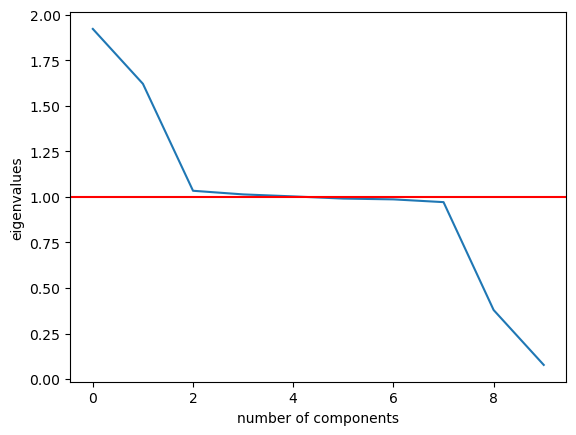

In [107]:
plt.plot(eigenvalues)
plt.xlabel('number of components')
plt.ylabel('eigenvalues')
plt.axhline(y=1, color='red')
plt.show()

In [108]:
print(eigenvalues)

[1.9219226786749717, 1.6207168106401517, 1.0337340608264778, 1.013809049772868, 1.0028491235431916, 0.9908222824553936, 0.9864842947295889, 0.97136130584395, 0.3792837085986406, 0.07796405333579234]
